<font size="4">The dataset has 12 features and 78k records.
<br>From this dataste, I would like to investigate two questions:
<br>--Is it possible to predict the product tier from the information given in the other columns? 
<br>--Is it possible to predict detail views from the information given in the other columns?

In [2]:
# If you need to install the packages just uncommon this cell.
# !pip install imbalanced-learn
# !pip install sklearn
# !pip install pandas
# !pip install numpy

<font size="5">Step 0 -- Import packages. It takes around 25-30 mins to run the whole file.</font>

In [3]:
# Basic package
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from collections import Counter

# Sklearn: metrics, prepocessing 
from sklearn.model_selection import train_test_split, cross_validate , KFold, RandomizedSearchCV
from sklearn.experimental import enable_halving_search_cv
from sklearn.model_selection import HalvingRandomSearchCV
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score, precision_score, recall_score,f1_score, classification_report, make_scorer, mean_absolute_error
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint, mannwhitneyu
from imblearn.over_sampling import SMOTE

# SKlearn: ML models
from sklearn.ensemble import RandomForestRegressor
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.linear_model import LinearRegression

<font size="5">Step 1 -- Import Dataset</font>

In [4]:
# Please check the file name and the path before you import the dataset
df_org = pd.read_csv("Data.csv", sep = ';')

In [5]:
df_org

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
0,350625839,Basic,Mitsubishi,16750,5,2013,24.07.18,24.08.18,3091.0,123.0,30,0.03780329990294403
1,354412280,Basic,Mercedes-Benz,35950,4,2015,16.08.18,07.10.18,3283.0,223.0,52,0.06792567773378008
2,349572992,Basic,Mercedes-Benz,11950,3,1998,16.07.18,05.09.18,3247.0,265.0,51,0.0816137973514013
3,350266763,Basic,Ford,1750,6,2003,20.07.18,29.10.18,1856.0,26.0,101,0.014008620689655173
4,355688985,Basic,Mercedes-Benz,26500,3,2014,28.08.18,08.09.18,490.0,20.0,12,0.04081632653061224
...,...,...,...,...,...,...,...,...,...,...,...,...
78316,348704581,Basic,Lexus,15740,8,2014,12.07.18,19.10.18,6895.0,230.0,99,0.03335750543872371
78317,359231940,Basic,Hyundai,2950,6,2006,28.09.18,23.10.18,1175.0,16.0,25,0.012936170212765956
78318,362425932,Basic,Volkswagen,7850,8,2014,04.11.18,21.11.18,448.0,21.0,16,0.046875
78319,357164227,Basic,Toyota,13945,5,2011,04.09.18,02.10.18,1617.0,29.0,28,0.017934446505875078


<font size="5">Step 2 -- EDA & Data cleaning</font>

In [6]:
# check the description of the numeric feature dataset
df_org.describe()

,article_id,price,first_zip_digit,first_registration_year,search_views,detail_views,stock_days
count,7.832100e+04,78321.000000,78321.000000,78321.000000,78311.000000,78311.000000,78321.000000
mean,3.574869e+08,15067.655316,4.632117,2011.089465,2297.502522,93.469870,35.986262
std,5.076572e+06,16374.497606,2.354275,6.538395,6339.034423,228.025588,32.214835
min,3.472324e+08,1.000000,1.000000,1924.000000,0.000000,0.000000,-3.000000
25%,3.536387e+08,5750.000000,3.000000,2008.000000,367.000000,13.000000,10.000000
50%,3.585480e+08,10900.000000,5.000000,2013.000000,920.000000,36.000000,25.000000
75%,3.614817e+08,18890.000000,7.000000,2015.000000,2234.000000,94.000000,55.000000
max,3.647040e+08,249888.000000,9.000000,2106.000000,608754.000000,13926.000000,127.000000


In [7]:
# check the Dtype and non-null count
print(df_org.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78321 entries, 0 to 78320
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   article_id               78321 non-null  int64  
 1   product_tier             78321 non-null  object 
 2   make_name                78321 non-null  object 
 3   price                    78321 non-null  int64  
 4   first_zip_digit          78321 non-null  int64  
 5   first_registration_year  78321 non-null  int64  
 6   created_date             78321 non-null  object 
 7   deleted_date             78321 non-null  object 
 8   search_views             78311 non-null  float64
 9   detail_views             78311 non-null  float64
 10  stock_days               78321 non-null  int64  
 11  ctr                      78297 non-null  object 
dtypes: float64(2), int64(5), object(5)
memory usage: 7.2+ MB
None


In [8]:
# check the null value count
print("Null value check:",df_org.isnull().sum())

Null value check: article_id                  0
product_tier                0
make_name                   0
price                       0
first_zip_digit             0
first_registration_year     0
created_date                0
deleted_date                0
search_views               10
detail_views               10
stock_days                  0
ctr                        24
dtype: int64


In [9]:
# Distribution of the product tier, it is an imbalance dataset
df_org.groupby('product_tier',axis = 0).size()

product_tier
Basic      75421
Plus         576
Premium     2324
dtype: int64

<AxesSubplot:ylabel='product_tier'>

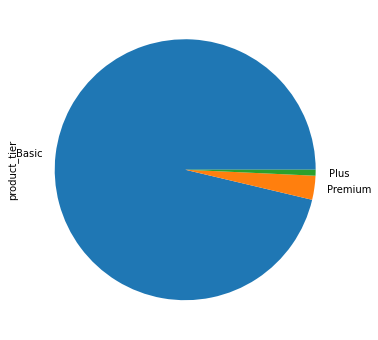

In [28]:
df_org['product_tier'].value_counts().plot(kind='pie', figsize = (14,6))

In [34]:
df_org.loc[df_org['product_tier'] == 'Basic', 'price'].mean()

15098.9328171199

Text(0, 0.5, 'Price')

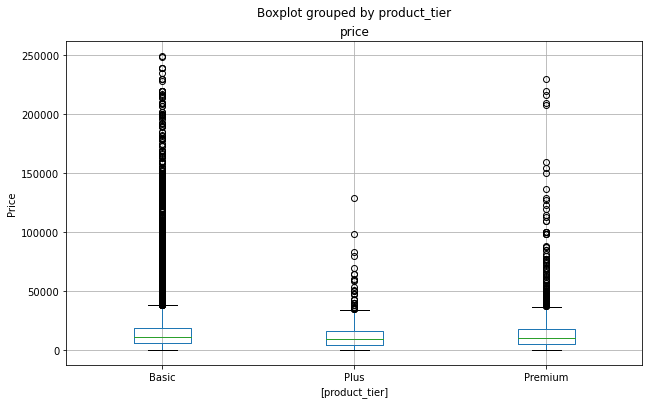

In [31]:
# Check the distribution of price and product tier
ax = df_org[['price','product_tier']].boxplot(by='product_tier', figsize= (10,6))
ax.set_ylabel("Price")

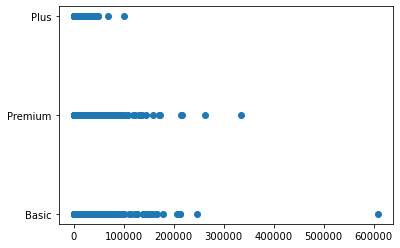

In [11]:
# Check the distribution of search views and product tier
plt.scatter(df_org['search_views'], df_org['product_tier'])

<font size = "4">After reviewing the dataset and data type, there are actions I will take here.
<br>1. change the Dtype of ctr to float64
<br>2. delete the record in the created_date or deleted_date greater than the current date, and check the stock_days record smaller than 0. 
<br>3. delete the record in the first registration year greater than the year of current date

<font size = "3">Change the Dtype of ctr from object(str) to float64.

In [12]:
# Build up a new dataframe and try to turn the Dtype of ctr into float64
df = df_org.copy()
try:
    df['ctr'] = df['ctr'].astype('float64')
except ValueError:
    print("The object could not be converted to float64.")

The object could not be converted to float64.


<font size = "3">I find there is an error type in the ctr object so I decide to double check all the numbers.

In [13]:
def isfloat(num:str):
    """
    This is a function to determine whether a str could be turned into float or not.
    input: str
    ouput: Boolean
    """
    try:
        float(num)
        return True
    except ValueError:
        return False

In [14]:
# Check the numbers of ctr value which could not be turned to float
numbers_of_wrong_number = 0
for index, value in enumerate(df['ctr']):
    if not isfloat(value):
        numbers_of_wrong_number += 1
print("There are", numbers_of_wrong_number, "value errors to turn into float dtype.")

There are 82 value errors to turn into float dtype.


<font size = "3">I decide to recalculate all the value for the ctr feature cause there are some errors.

In [15]:
# Calculate the ctr. ctr = # of detail views/ # of search views
df['ctr'] = df['detail_views']/df['search_views']

In [16]:
# Check whether any ctr greater than 1. I will remove these records later.
df.loc[df['ctr'] >1]

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
32000,355652116,Basic,Fiat,6650,7,2008,28.08.18,28.08.18,12.0,22.0,0,1.833333
39172,351144455,Basic,Nissan,16970,1,2013,28.07.18,28.07.18,15.0,21.0,0,1.400000


<font size = "3"> Remove the record which created date or deleted date greater than the current date, and check the stock_days record less than 0. 
<br>Stock_days definition: Time in days between the creation of the listing and the deletion of the listing


In [17]:
# check the stock days < 0
df.loc[df['stock_days'] < 0]

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
161,359768765,Basic,MINI,19950,7,2011,04.10.18,04.10.18,4.0,1.0,-1,0.250000
873,362809203,Basic,Toyota,13495,3,2014,08.11.18,09.11.18,85.0,0.0,-1,0.000000
1269,347248705,Basic,Volkswagen,13925,7,2013,04.07.18,04.07.18,29.0,5.0,-1,0.172414
5095,357831511,Basic,Bentley,69950,1,2007,12.09.18,12.09.18,47.0,0.0,-1,0.000000
5477,348703289,Basic,Chevrolet,18900,7,1966,12.07.18,12.07.18,100.0,19.0,-1,0.190000
...,...,...,...,...,...,...,...,...,...,...,...,...
76209,362810854,Basic,Audi,4450,7,2005,08.11.18,08.11.18,74.0,8.0,-1,0.108108
77128,364284041,Basic,Volkswagen,2950,1,2007,24.11.18,24.11.18,156.0,19.0,-1,0.121795
77676,358519572,Basic,Mercedes-Benz,34950,7,2017,20.09.18,20.09.18,16.0,0.0,-1,0.000000
77808,363557939,Basic,Nissan,6485,7,2010,16.11.18,16.11.18,137.0,8.0,-1,0.058394


In [18]:
# Convert the Dtype from string to datetime. Then I can calculate the stock days based on the created_date and deleted_date.
# First, trim all strings to remove any space.
# Second, convert all the strings into datetime.

df['created_date'] = df['created_date'].replace({" ": ''}, regex = True)
df['created_date'] = pd.to_datetime(df['created_date'], format = "%d.%m.%y")

df['deleted_date'] = df['deleted_date'].replace({" ": ''}, regex = True)
df['deleted_date'] = pd.to_datetime(df['deleted_date'], format = "%d.%m.%y")

In [19]:
# confrim: there is no created_date or deleted_date greater than today
# confirm: there is no created_date > deleted_date

df.loc[df['created_date'] > pd.to_datetime('today')]
df.loc[df['deleted_date'] > pd.to_datetime('today')]
df.loc[df['created_date'] > df['deleted_date']]

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr


<font size = "3"> Recalculate the stock days

In [20]:
# Calculate the stock days
df['stock_days'] = (df['deleted_date'] - df['created_date']).dt.days
# confirm: there is no stock days less than 0.
df.loc[df['stock_days'] < 0]

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr


<font size = "3"> Check any record in the first registration year greater than the year of the current year.

In [21]:
df.loc[df['first_registration_year']>pd.to_datetime('today').year]

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr
36302,358877131,Basic,Opel,9250,7,2106,2018-09-24,2018-09-26,113.0,5.0,2,0.044248


<font size = "3">Drop the records in which first_registration_year is greater than the current year, search_views is null, or ctr is greater than 1.

In [22]:
# Drop the record.
df = df.drop(index = df.loc[df['first_registration_year']>pd.to_datetime('today').year].index)
df = df.drop(index = df.loc[df['search_views'].isnull()].index)
df = df.drop(index = df.loc[df['ctr'] > 1 ].index)

# reindex the dataframe
df.index = range(len(df))

In [23]:
# Deal with null records in views and ctr. I will turn NaN to 0.
j = df.isnull().sum()
for index,i in enumerate(j):
    if i > 0:
        df[df.columns[index]].fillna(0,inplace=True)

<font size ="5">End data cleaning - Double check the dataset after preprocessing </font>

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78308 entries, 0 to 78307
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   article_id               78308 non-null  int64         
 1   product_tier             78308 non-null  object        
 2   make_name                78308 non-null  object        
 3   price                    78308 non-null  int64         
 4   first_zip_digit          78308 non-null  int64         
 5   first_registration_year  78308 non-null  int64         
 6   created_date             78308 non-null  datetime64[ns]
 7   deleted_date             78308 non-null  datetime64[ns]
 8   search_views             78308 non-null  float64       
 9   detail_views             78308 non-null  float64       
 10  stock_days               78308 non-null  int64         
 11  ctr                      78308 non-null  float64       
dtypes: datetime64[ns](2), float64(3)

In [24]:
df.describe()

,article_id,price,first_zip_digit,first_registration_year,search_views,detail_views,stock_days,ctr
count,7.830800e+04,78308.000000,78308.000000,78308.000000,78308.000000,78308.000000,78308.000000,78308.000000
mean,3.574871e+08,15069.234523,4.632068,2011.089046,2297.588752,93.472838,35.988711,0.046844
std,5.076672e+06,16375.302568,2.354324,6.529684,6339.140532,228.029446,32.213590,0.037986
min,3.472324e+08,50.000000,1.000000,1924.000000,0.000000,0.000000,0.000000,0.000000
25%,3.536387e+08,5750.000000,3.000000,2008.000000,367.000000,13.000000,10.000000,0.024257
50%,3.585479e+08,10909.000000,5.000000,2013.000000,920.000000,36.000000,25.000000,0.038225
75%,3.614817e+08,18890.000000,7.000000,2015.000000,2234.000000,94.000000,55.000000,0.058676
max,3.647040e+08,249888.000000,9.000000,2020.000000,608754.000000,13926.000000,126.000000,1.000000


price              AxesSubplot(0.125,0.536818;0.227941x0.343182)
search_views    AxesSubplot(0.398529,0.536818;0.227941x0.343182)
detail_views    AxesSubplot(0.672059,0.536818;0.227941x0.343182)
stock_days            AxesSubplot(0.125,0.125;0.227941x0.343182)
ctr                AxesSubplot(0.398529,0.125;0.227941x0.343182)
dtype: object

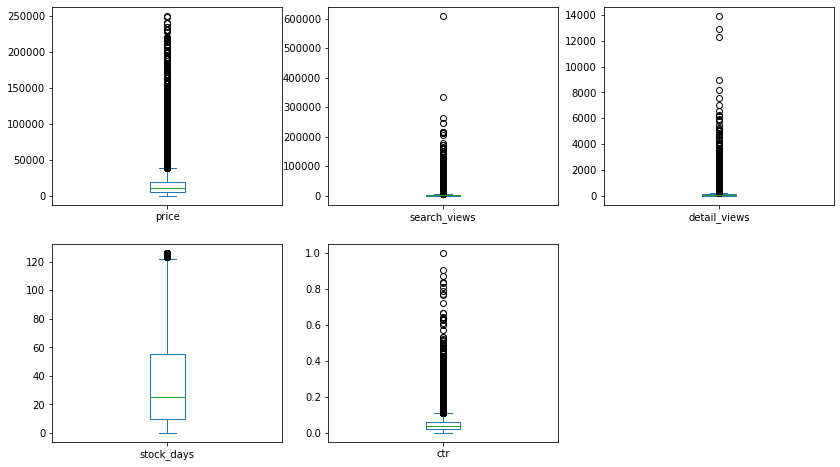

In [33]:
boxplot_col = ['price', 'search_views', 'detail_views', 'stock_days', 'ctr']

df[boxplot_col].plot(kind = 'box', subplots = True, layout = (2,3), figsize=(14, 8))

In [25]:
df.isnull().sum()

article_id                 0
product_tier               0
make_name                  0
price                      0
first_zip_digit            0
first_registration_year    0
created_date               0
deleted_date               0
search_views               0
detail_views               0
stock_days                 0
ctr                        0
dtype: int64

<font size="5"> Step 3 data preprocessing <font>

<font size = "3">Create a new feature called cd_dow from the day of the week of the created date of the article. I assume the post's date might have a relationship to the product tier.

In [26]:
df['cd_dow'] = df['created_date'].dt.dayofweek

<font size="5"> Step 4 data splitting <font>

In [27]:
def create_dummy(df):
    """
    This function can turn the dataframe with categorical value into dummy variables.
    input: dataframe
    output: data frame with dummy variables
    """
    
    df = pd.get_dummies(df)
    return df

<font size = "3"> After I run the RandomForest model, I get the average feature importance: { make_name:0.084, price:0.109, first_zip_digit: 0.089, first_registration_year: 0.088, search_views:0.173, detail_views:0.128, stock_days: 0.147, ctr: 0.127, cd_dow: 0.054}.
<br> I decide to drop the lowest feature importance first. Because the value of feature importance in make_name, first_zip_digit, first_registration_year are too closed, I decide to keep them all at this moment. 
<br> The final features are price, search_views, detail_views, stock_days, ctr, make_name, first_zip_digit, first_registration_year.

In [28]:
#Create X

X = df.drop(columns = ['article_id', 'product_tier', 'created_date', 'deleted_date', 'cd_dow' ])

#Turn the make name from string to label(0,1,2,3...)
lee = LabelEncoder()
lee.fit(df['make_name'])
X['make_name'] = lee.transform(df['make_name'])

#Create
# Turn the product tier from string to label(0,1,2,3...)
le = LabelEncoder()
le.fit(df['product_tier'])
y = le.transform(df['product_tier'])

In [29]:
# Split the dataset, test/train = 20/80
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

Because the product tier is imbalance, I use SMOTE to oversample the minority classes to see whether it can help.

In [30]:
# imbalance dataset, SMOTE
# I use oversample the minority class 1.5 times.
c = Counter(y_train)
over = SMOTE(sampling_strategy= ({0: int(c[0]), 1: int(c[1]*1.5), 2: int(c[2]*1.5)}))

# transform the training dataset, and also keep the original training set. 
X_train_o, y_train_o = over.fit_resample(X_train, y_train)

In [31]:
print("Original training data:", Counter(y_train), ", training dataset with oversampling:", Counter(y_train_o))

Original training data: Counter({0: 60355, 2: 1831, 1: 460}) , training dataset with oversampling: Counter({0: 60355, 2: 2746, 1: 690})


<font size="5"> Step 5 Question 1 -- Model running -- Is it possible to predict the product tier from the information given in the other columns?
<br>Potential model: Naive Bayes Classifier and BalancedRandomForest. The reason why I pick BalancedRandomForest model is because this dataset has imbalance issue and high dimensions. Random Forest has the class weight parameter, bootstrap to avoid the imbalance issue and increase randomized and it is not hard to train with high dimensions dataset. Unlike SVM or KNN. Also, it performs well in Random Forest than Naive Bayes in this dataset.

In [32]:
def evaluation(y, y_hat, index = ['Basic','Plus','Premium'], title = 'Confusion Matrix',):
    """
    This is a function to create the confusion matrix.
    Input: y:testing labels(array), y_hat: predicting labels(array), index: all the class label (list)
    """
    cm = confusion_matrix(y, y_hat)
    cm_df = pd.DataFrame(cm, index, columns = index)
    precision = precision_score(y, y_hat,average =None)
    recall = recall_score(y, y_hat, average =None)
    accuracy = accuracy_score(y,y_hat)
    f1 = f1_score(y,y_hat, average =None)
    print('Recall: ', recall)
    print('Accuracy: ', accuracy)
    print('Precision: ', precision)
    print('F1: ', f1)
    sns.heatmap(cm_df, annot=True, fmt='g', annot_kws= {'size':20})
    plt.xlabel('predicted', fontsize=18)
    plt.ylabel('actual', fontsize=18)
    plt.title(title, fontsize=18)
    
    plt.show()

In [33]:
def cross_validate(classifier, df_X_train, df_y_train,  cv = KFold(shuffle = True)):
    """
    This function is to cross validate the result. Normally, we use Kfold.
    input: classifier, X_train: training dataset(dataframe), y_train: training labels(series), cv: cross validation model
    output: average value of the 25 outputs, including training, testing arruacy and recall.
    """
    # clf = Pipeline(steps=[
    #     ('preprocess', preprocess),
    #     ('classifier', classifier)
    # ])
    
    train_acc_list = []
    val_acc_list = []
    train_recall_list = []
    val_recall_list = []
    train_f1_list = []
    val_f1_list = []
    
    #Run 5 times cross_validation and return the average result
    for _ in range(5):
        
        train_acc = []
        val_acc = []
        train_recall = []
        val_recall = []
        train_f1 = []
        val_f1 = []
        
        for train_ind, val_ind in cv.split(df_X_train, df_y_train):
            X_t, y_t = df_X_train.iloc[train_ind], df_y_train[train_ind]
            classifier.fit(X_t, y_t)
            y_hat_t = classifier.predict(X_t)
            train_acc.append(accuracy_score(y_t, y_hat_t))
            train_recall.append(recall_score(y_t, y_hat_t, average =None))
            train_f1.append(f1_score(y_t, y_hat_t, average =None))
            
            X_val, y_val = df_X_train.iloc[val_ind], df_y_train[val_ind]
            y_hat_val = classifier.predict(X_val)
            val_acc.append(accuracy_score(y_val, y_hat_val))
            val_recall.append(recall_score(y_val, y_hat_val, average =None))
            val_f1.append(f1_score(y_val, y_hat_val, average =None))
            # If you want to show the visulization at every cross validation and show the feature importance just uncomment the following code.
            # print(evaluation(y_val, y_hat_val))
            # print(classifier.feature_importances_)
        
        train_acc_list.append(train_acc)
        val_acc_list.append(val_acc)
        train_recall_list.append(train_recall)
        val_recall_list.append(val_recall)
        train_f1_list.append(train_f1)
        val_f1_list.append(val_f1)
    
    return train_acc_list, val_acc_list, train_recall_list, val_recall_list, train_f1_list, val_f1_list

<font size = "4">Run the model. I focus on the F1 metric because the FN or FP has a similar business situation. I assume this tag will be a criterion for the customers to filter the car or sort the cars. If the customers choose a specific tier of cars and the quality of the tag is not good. It will break the customers' trust in us and make the customers more confused. So I will look at F1 score, also keep tracking the Recall and Precision.

In [34]:
# Implement the model without any parameter tuning.
clf = BalancedRandomForestClassifier()
train_acc, val_acc, train_recall, val_recall, train_f1, val_f1 = cross_validate(clf, X_train, y_train)

print("train_acc:", np.mean(train_acc), "test_acc:", np.mean(val_acc), "train_recall:", np.mean(train_recall), "test_recall:", np.mean(val_recall), "train_f1:", np.mean(train_f1), "test_f1:", np.mean(val_f1) ) 

train_acc: 0.7937442011998891 test_acc: 0.7840596704074321 train_recall: 0.8681978671258657 test_recall: 0.6848357782514146 train_f1: 0.5020395685944391 test_f1: 0.4608110930670081


<font size="3">After I get the initial result, I tried to use Hyperparameter tuning to acquire a better result. I will run the original dataset and oversampling dataset to see the difference.

<font size="3"> This hyperparameter tuning process takes around 5-6mins.

In [35]:
# Find the best hyperparameter using hyperparameter tuning(RandomSearch).
# This is the original dataset
scorer_recall = make_scorer(recall_score, average = "macro")
scorer_precision = make_scorer(precision_score, average = "macro")
scorer_accuracy = make_scorer(accuracy_score,  average = "macro")
scorer_f1 = make_scorer(f1_score,  average = "macro")

clf_original = BalancedRandomForestClassifier()
clf_over_sample = BalancedRandomForestClassifier()

param_distributions = {"max_depth": randint(2,20), 
                       "min_samples_split": randint(2, 20), 
                       "criterion" :("gini", "entropy"), 
                       "sampling_strategy": ("auto", "not majority", "all") ,
                       "class_weight":({0: .01, 1: 0.54, 2:0.45}, {0: .0001, 1: 0.54, 2:0.45}, {0: .05, 1: 0.5, 2:0.45}, "balanced")
                      }
search = HalvingRandomSearchCV(clf_original, param_distributions, resource='n_estimators', max_resources=100, random_state=0, scoring = scorer_f1).fit(X_train, y_train)
print("The original training dataset:", search.best_params_)

search_oversample = HalvingRandomSearchCV(clf_over_sample, param_distributions, resource='n_estimators', max_resources=100, random_state=0, scoring = scorer_f1).fit(X_train_o, y_train_o)
print("The oversampling training dataset:", search_oversample.best_params_)

The original training dataset: {'class_weight': 'balanced', 'criterion': 'gini', 'max_depth': 13, 'min_samples_split': 19, 'sampling_strategy': 'not majority', 'n_estimators': 81}
The oversampling training dataset: {'class_weight': {0: 0.01, 1: 0.54, 2: 0.45}, 'criterion': 'gini', 'max_depth': 17, 'min_samples_split': 17, 'sampling_strategy': 'not majority', 'n_estimators': 81}


<font size="3">Run the result after getting the hyperparameters.

In [36]:
# The result for the original dataset
p0 = search.best_params_
clf_BRFC = BalancedRandomForestClassifier(n_estimators = p0['n_estimators'], min_samples_split = p0['min_samples_split'],
                                    sampling_strategy= p0['sampling_strategy'], criterion= p0['criterion'],
                                    max_depth= p0['max_depth'], class_weight = p0['class_weight'])

train_acc, val_acc, train_recall, val_recall, train_f1, val_f1 = cross_validate(clf_BRFC, X_train, y_train)
print("train_acc:", np.mean(train_acc), "test_acc:", np.mean(val_acc), "train_recall:", np.mean(train_recall), "test_recall:", np.mean(val_recall), "train_f1:", np.mean(train_f1), "test_f1:", np.mean(val_f1) )

train_acc: 0.9610621618077121 test_acc: 0.9503400051863714 train_recall: 0.8031514605579494 test_recall: 0.5311977393940182 train_f1: 0.6415917542453735 test_f1: 0.5176262672595154


In [37]:
# The result for the oversampling on minority class dataset
p1 = search_oversample.best_params_
clf_BRFC_o = BalancedRandomForestClassifier(n_estimators = p1['n_estimators'], min_samples_split = p1['min_samples_split'],
                                    sampling_strategy= p1['sampling_strategy'], criterion= p1['criterion'],
                                    max_depth= p1['max_depth'], class_weight = p1['class_weight'])

train_acc_o, val_acc_o, train_recall_o, val_recall_o, train_f1_o, val_fl_o = cross_validate(clf_BRFC_o, X_train_o, y_train_o)
print("train_acc:", np.mean(train_acc_o), "test_acc:", np.mean(val_acc_o), "train_recall:", np.mean(train_recall_o), "test_recall:", np.mean(val_recall_o), "train_f1:", np.mean(train_f1_o), "test_f1:", np.mean(val_fl_o) )

train_acc: 0.9766369849696922 test_acc: 0.9602984848407219 train_recall: 0.8628248652749513 test_recall: 0.5610627557562988 train_f1: 0.8498608695625399 test_f1: 0.6052587471653978


<font size="3">Perform statistical testing on val_f1 and val_f1_o to show the statistical significance by seeing the p-value less than 0.05. It means these two groups of the result are significantly different. Then we can decide which model has a better performance.

In [38]:
# The whitney test
U1, p_value_1 = mannwhitneyu(np.stack(val_f1, axis=1 ).flatten(), np.stack(val_fl_o, axis=1 ).flatten())
# If they are not in the same group it means there is one group performing better than the other. If yes then their prediction performance should be similar. 
print("Are these two group of results from the same group:", p_value_1 > 0.05)

Are these two group of results from the same group: False


<font size="3">It seems like the oversampling dataset provides more information to the classifier. But it might have an overfitting issue, so I have to check the prediction on testing data and results.

In [39]:
y_pred = clf_BRFC.predict(X_test)
y_pred_o = clf_BRFC_o.predict(X_test)

<font size="3">Result from original dataset.

Recall:  [0.97515445 0.25       0.36511156]
Accuracy:  0.9505810241348487
Precision:  [0.98003739 0.06318083 0.8       ]
F1:  [0.97758982 0.10086957 0.50139276]


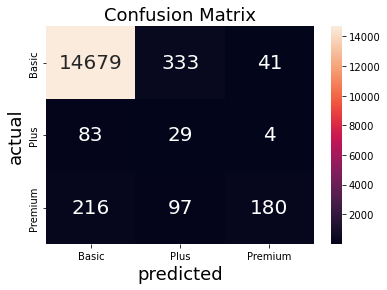

In [40]:
evaluation(y_test, y_pred)

<font size="3">Result from oversampling minority classes dataset.

Recall:  [0.99129742 0.04310345 0.45030426]
Accuracy:  0.9672455625079811
Precision:  [0.97797877 0.05154639 0.72312704]
F1:  [0.98459305 0.04694836 0.555     ]


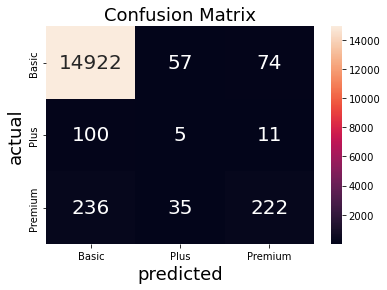

In [41]:
evaluation(y_test, y_pred_o)

<font size="4"> Conclusion: Based on the F1 score result, the product tier can be predicted.
But the Plus class prediction should be improved. Furthermore, I will choose the dataset without implementing SMOTE oversampling technique. The Plus class is performing well with the original training dataset.
<br> Even though the macro value of all metrics is closed, I would like to pick a model that better predicts minority class. There is a trade-off between Recall and Precision.
<br> I think it can improve the metrics if I can acquire more data points in the imbalance class or even more features.

-------

<font size="5"> Step 6 Question 2 Model running - Is it possible to predict detail views from the information given in the other columns? 
<br >Because detail views are a continuous number I use regression models. However, we face the outlier issue in detail views. Therefore, I use linear and non-linear models to predict the detail views because of the difference in robustness on outliers.

In [42]:
#Create X_re 

X_re = df.drop(columns = ['article_id', 'created_date', 'deleted_date', 'detail_views', 'ctr', 'cd_dow']) #search_views, stock_days, registration_year, product_tier 'make_name', 'price', 'first_zip_digit'

lee = LabelEncoder()
lee.fit(df['make_name'])
X_re['make_name'] = lee.transform(df['make_name'])
# X_re =  pd.concat([X_re, create_dummy(df['make_name'])], axis = 1)
# X_re = X_re.drop(columns = 'make_name')

#Create y_re
le = LabelEncoder()
le.fit(df['product_tier'])
X_re['product_tier'] = le.transform(df['product_tier'])

y_re = df['detail_views'] #ctr

In [43]:
# Split the dataset, test/train = 20/80
X_train_re, X_test_re, y_train_re, y_test_re = train_test_split(X_re, y_re, test_size=0.2, random_state=42)

{'whiskers': [<matplotlib.lines.Line2D at 0x7fb9f445b7f0>,
 'caps': [<matplotlib.lines.Line2D at 0x7fb9f445be50>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fb9f445b520>],
 'medians': [<matplotlib.lines.Line2D at 0x7fb9f4469370>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fb9f4469640>],
 'means': []}

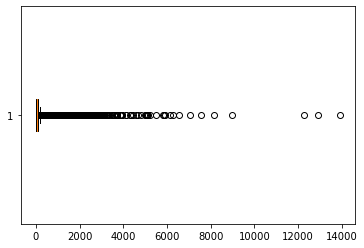

In [44]:
plt.boxplot(df["detail_views"], vert = 0)

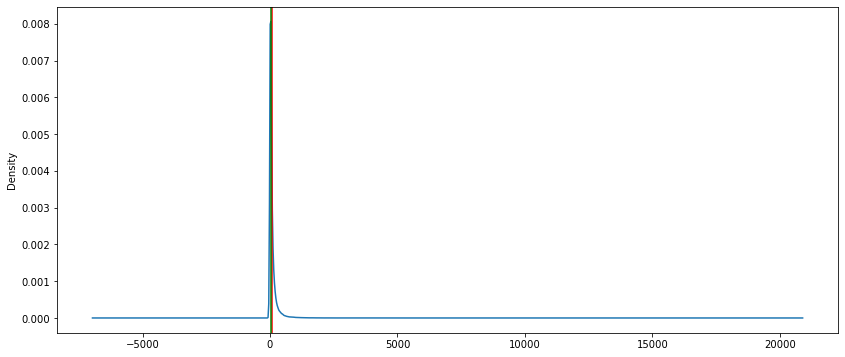

In [26]:
ax = df["detail_views"].plot(kind = 'density', figsize=(14, 6))
ax.axvline(df["detail_views"].mean(), color='red')
ax.axvline(df["detail_views"].median(), color='green')

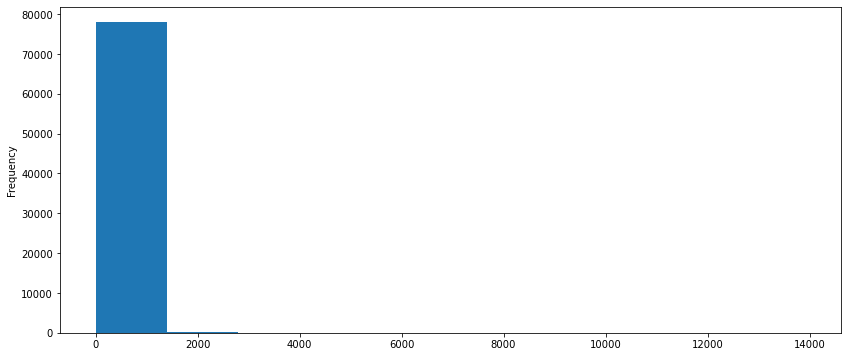

In [27]:
ax = df["detail_views"].plot(kind = 'hist', figsize=(14, 6))

In [45]:
df['detail_views'].describe()

count    78308.000000
mean        93.472838
std        228.029446
min          0.000000
25%         13.000000
50%         36.000000
75%         94.000000
max      13926.000000
Name: detail_views, dtype: float64

<font size="3"> It is obvious that the distribution of the detail views is skewed. You can tell from the differece between mean(93.5) and median(36).

In [46]:
# Check the outliers. Formula = mean +- 3* standard deviation.

df.loc[(df['detail_views'] > np.mean(df['detail_views']) + 3 * np.std(df['detail_views'])) | (df['detail_views'] < np.mean(df['detail_views']) - 3 * np.std(df['detail_views']))]

,article_id,product_tier,make_name,price,first_zip_digit,first_registration_year,created_date,deleted_date,search_views,detail_views,stock_days,ctr,cd_dow
25,353088830,Basic,Porsche,12950,5,2005,2018-08-04,2018-09-27,15318.0,1274.0,54,0.083170,5
113,350268198,Basic,Fiat,950,3,2003,2018-07-20,2018-09-17,16740.0,930.0,59,0.055556,4
118,363615144,Basic,Ford,399,8,2004,2018-11-16,2018-12-01,12828.0,1152.0,15,0.089804,4
279,357829441,Basic,Mercedes-Benz,3250,4,2004,2018-09-12,2019-01-07,17024.0,814.0,117,0.047815,2
286,350226406,Premium,BMW,11909,2,2005,2018-07-20,2018-10-03,26037.0,951.0,75,0.036525,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
78130,361204153,Premium,Mercedes-Benz,5950,8,2008,2018-10-20,2018-12-05,20459.0,867.0,46,0.042377,5
78203,358548599,Basic,Lexus,10200,2,2012,2018-09-20,2019-01-17,22594.0,936.0,119,0.041427,3
78245,350268403,Basic,Audi,2950,7,2006,2018-07-20,2018-08-22,17218.0,1067.0,33,0.061970,4
78284,353006120,Basic,Opel,2399,3,2008,2018-08-04,2018-11-12,27609.0,2240.0,100,0.081133,5


Confirm detail views is skewed and has 1000+ outliers.

<font size="3"> I implement two models. One model is a linear regression model that is not robust to the outliers, and the other is a non-linear regression model robust to the outliers. I choose Mean Absolute error as a metric because this metric will not be affected by outliers. On the other hand, if I use the Mean Squared error, it is affected by the huge errors.

In [47]:
def cross_validate_re(classifier, df_X_train, df_y_train,  cv = KFold(shuffle = True)):
    """
    This function is to cross validate the result. Normally, we use Kfold.
    input: classifier, X_train: training dataset(dataframe), y_train: training labels(series), cv: cross validation model
    output: average value of the 25 outputs, including training, testing MAE and RS.
    """
    # clf = Pipeline(steps=[
    #     ('preprocess', preprocess),
    #     ('classifier', classifier)
    # ])
    
    # Mean Absolute Error list
    train_MAE_list = []
    val_MAE_list = []
    # R-Squared list
    train_RS_list = []
    val_RS_list = []
    
    #Run 5 times cross_validation and return the average result
    for _ in range(5):
        
        train_MAE = []
        val_MAE = []
        train_RS = []
        val_RS = []
        
        for train_ind, val_ind in cv.split(df_X_train, df_y_train):
            X_t, y_t = df_X_train.iloc[train_ind], df_y_train.iloc[train_ind]
            classifier.fit(X_t, y_t)
            y_hat_t = classifier.predict(X_t)
            train_MAE.append(mean_absolute_error(y_t, y_hat_t))
            train_RS.append(classifier.score(X_t, y_t))
            
            X_val, y_val = df_X_train.iloc[val_ind], df_y_train.iloc[val_ind]
            y_hat_val = classifier.predict(X_val)
            val_MAE.append(mean_absolute_error(y_val, y_hat_val))
            val_RS.append(classifier.score(X_val, y_val))
        
        train_MAE_list.append(train_MAE)
        val_MAE_list.append(val_MAE)
        train_RS_list.append(train_RS)
        val_RS_list.append(val_RS)
        
    return train_MAE_list, val_MAE_list, train_RS_list, val_RS_list

Linear Regression model - This model is not robust to outliers.

In [48]:
clf_lr = LinearRegression()
train_MAE_lr, val_MAE_lr, train_RS_lr, val_RS_lr = cross_validate_re(clf_lr ,X_train_re, y_train_re)

print("train_MAE:", np.mean(train_MAE_lr), "test_MAE:", np.mean(val_MAE_lr), "train_RS:", np.mean(train_RS_lr), "test_RS:", np.mean(val_RS_lr))

train_MAE: 42.82636139915118 test_MAE: 42.87466274602899 train_RS: 0.7252841805285887 test_RS: 0.7201245431901316


Non-Linear Regression model -- This cross validation takes 10 mins. This model is robust to outliers.

In [49]:
clf_rfr = RandomForestRegressor()
train_MAE_rfr, val_MAE_rfr, train_RS_rfr, val_RS_rfr = cross_validate_re(clf_rfr ,X_train_re, y_train_re)

print("train_MAE:", np.mean(train_MAE_rfr), "test_MAE:", np.mean(val_MAE_rfr), "train_RS:", np.mean(train_RS_rfr), "test_RS:", np.mean(val_RS_rfr))

train_MAE: 14.531676386135468 test_MAE: 39.1298717594593 train_RS: 0.9645851048612787 test_RS: 0.7475649978774558


In [50]:
# Add the whitney test
U2, p_value_2 = mannwhitneyu(np.stack( val_MAE_lr, axis=1 ).flatten(), np.stack( val_MAE_rfr, axis=1 ).flatten())
# If they are not in the same group it means there is one group performing better than the other. If yes then their prediction performance should be similar. 
print("Are these two group of results from the same group:", p_value_2 > 0.05)

Are these two group of results from the same group: False


It seems the result showing the performance of these two models is different. So I will choose Random-Forest Regressor as my model to predict the detail views.

In [51]:
lr = LinearRegression().fit(X_train_re, y_train_re)
y_pred_lr = lr.predict(X_test_re)
errors_lr = mean_absolute_error(y_test_re, y_pred_lr)
print("Testing result from Linear Regression:")
print("MAE:", round(errors_lr, 2))
print("R-Squared:", round(lr.score(X_test_re, y_test_re),4))

Testing result from Linear Regression:
MAE: 44.89
R-Squared: 0.6496


In [52]:
rfr = RandomForestRegressor().fit(X_train_re, y_train_re)
y_pred_rfr = rfr.predict(X_test_re)
errors_rfr = mean_absolute_error(y_test_re, y_pred_rfr)
print("Testing result from Random-Forest Regressor:")
print("MAE:", round(errors_rfr, 2))
print("R-Squared:", round(rfr.score(X_test_re, y_test_re),4))

Testing result from Random-Forest Regressor:
MAE: 40.53
R-Squared: 0.6901


<font size="4"> Conclusion: Based on the R-Squared result above, the detail views are predictable. I can get the metrics around R-Squared(0.7) and MAE(40) from Random-Forest Regressor. I choose the random-forest regressor over linear regression because the cross-validation shows the performance of the random-forest regressor is better than the linear regression model significantly. 
<br>I think it can improve the metrics if I can acquire more features.